# Exploration and prediction of important factors affecting life expectancy

## Introduction


Health is considered to be one of the most fundamental human rights. The Sustainable Development Goals released by the United Nations set out the goals of reducing neonatal mortality, preventing and stopping premature deaths from non-communicable diseases, and enhancing national health and well-being (United Nations, 2022). Life expectancy is not only an indicator to measure the health status of the population but also reflects, to a certain extent, the economic development and the level of medical care of the country or region. Since 2000, the global average life expectancy has been steadily increasing, from an initial 66.8 years to 73.4 years in 2019. Still, the differences between countries and regions are striking. There is a huge gap between countries with the longest life expectancy (84.26 years) and those with the shortest (50.75 years) (World Health Organization, 2019). Many scholars have studied cases in different countries to try to figure out the factors that affect life expectancy.


## Literature review

According to the current studies, the influencing factors can be mainly classified as social, economic, environmental, and other health factors (Mondal and Shitan, 2014). Areas with higher income and higher education levels tend to have a higher life expectancy as well (Kim and Kim, 2016). In addition, the level of income and expenditure can also reflect this situation (Okamoto, 2006). Other factors, including homicide rates, also affect life expectancy (Wilson and Daly, 1997). However, it has also been shown that the effects of these factors do not show significant effects in all countries and that the economy plays a more promoting role in countries with low development levels (Azomahou, et al., 2009). This inequality of the national basic economy shows certain differentiation in its impact on health (Herzer and Nunnenkamp, 2015). Therefore, this coursework includes a distinction of the country status, which divided all countries into developed and developing ones, and conducts a comparative study between them to better find their similarities and differences.

## Research question

Based on the above discussion, it is intended to further explore the influencing factors of life expectancy and the differences between different groups. So here the research question is: <br/>
What are the factors that affect life expectancy? <br/>
Are the results in developed countries the same as developing countries? <br/>
And which of these factors is more important?

## Methodology

A variety of machine learning approaches are used to train models that better predict and reflect the effects of life expectancy. These models are used to find several factors that have a more comprehensive influence on life expectancy and take them as features. Finally, life expectancy is classified according to the features. The main methods used include OLS regression, classification and regression tree, random forest, XGBoost, KNN, and data visualization.

## Presentation of data

The data set was obtained from [Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who), and the figures for the factors in the table were obtained from the [World Health Organization (WHO)](https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy) and the [United Nation website](https://www.un.org/en/). Moreover, data from regions for different countries is used and it comes from the [United Nations Statistics Division](https://unstats.un.org/unsd/methodology/m49/overview/). The dataset includes country, year, country status, life expectancy, economic factors (GDP, income, expenditure), social factors (population, schooling), health-related factors (alcohol, BMI, HIV), and mortality (adult mortality, infant mortality).And year 2014 is selected as the representative for the follow-up analysis.

First, load the packages that will be used later in the analysis, and import the dataset.

In [1]:
# basic packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

# pyecharts visualization
# Add "!" before installing modules in the jupter notebook
!pip install pyecharts
from pyecharts.charts import Line,Bar
from pyecharts import options as opts

# Display the pyecharts diagram in the jupter lab
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

# other plot package
import plotly.express as px

# preprocessors
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

# linear regression
from sklearn.linear_model import LinearRegression

# decision tree package
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

# decision tree visualization package
!pip install dtreeplot
from sklearn.feature_extraction import DictVectorizer
from dtreeplot import model_plot
from sklearn import datasets

# random forest
from sklearn.ensemble import RandomForestRegressor

# feature importance
import rfpimp
from rfpimp import permutation_importances

# xgboost
import xgboost
from xgboost import XGBRegressor

# KNN
from sklearn.neighbors import KNeighborsClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 3.5 MB/s eta 0:00:00


In [2]:
# import data
data_org = pd.read_csv("https://raw.githubusercontent.com/yujingDING/dsss_coursework/main/Life_Expectancy_Data.csv")

In [3]:
# make a copy of orignal data and following steps will all based on the copy one
# show the dataset and its infomation

data_all = data_org.copy()
data_all.info()
data_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7    BMI                             2904 non-null   float64
 8   Total expenditure                2712 non-null   float64
 9    HIV/AIDS                        2938 non-null   float64
 10  GDP                              2490 non-null   float64
 11  Population                       2286 non-null   float64
 12  Income composition o

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol   BMI   Total expenditure   HIV/AIDS         GDP  \
0             62     0.01   19.1               8.16        0.1  584.259210   
1             64     0.01   18.6               8.18        0.1  612.696514   
2             66     0.01   18.1               8.13        0.1  631.744976   
3             69     0.01   17.6               8.52        0.1  669.959000   
4             71     0.01   17.2               7.87        0.1   63.537231   

   Population  Income composition of resources  Schooling  
0  33736494.0                            0.479       10.1  
1    327582.0                            0.476       10.0  
2  31731688.0                            0.470        9.9  
3   3696958.0                            0.463        9.8  
4   2978599.0                            0.454        9.5

## Data pre-process

The dataset contains data from 2000 to 2015. In order to avoid no correlation between the data of different years, and as there are more missing data in 2015, year 2014 is selected as the representative for subsequent analysis.

In [4]:
data2014 = data_all[data_all["Year"]==2014]
data2014.info()
data2014.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 2923
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Year                             183 non-null    int64  
 2   Status                           183 non-null    object 
 3   Life expectancy                  183 non-null    float64
 4   Adult Mortality                  183 non-null    float64
 5   infant deaths                    183 non-null    int64  
 6   Alcohol                          182 non-null    float64
 7    BMI                             181 non-null    float64
 8   Total expenditure                181 non-null    float64
 9    HIV/AIDS                        183 non-null    float64
 10  GDP                              155 non-null    float64
 11  Population                       142 non-null    float64
 12  Income composition of

Country  Year      Status  Life expectancy   Adult Mortality  \
1           Afghanistan  2014  Developing              59.9            271.0   
17              Albania  2014  Developing              77.5              8.0   
33              Algeria  2014  Developing              75.4             11.0   
49               Angola  2014  Developing              51.7            348.0   
65  Antigua and Barbuda  2014  Developing              76.2            131.0   

    infant deaths  Alcohol   BMI   Total expenditure   HIV/AIDS           GDP  \
1              64     0.01   18.6               8.18        0.1    612.696514   
17              0     4.51   57.2               5.88        0.1   4575.763787   
33             21     0.01   58.4               7.21        0.1    547.851700   
49             67     8.33   22.7               3.31        2.0    479.312240   
65              0     8.56   47.0               5.54        0.2  12888.296670   

    Population  Income composition of resources  Schooling  
1     327582.0                            0.476       10.0  
17    288914.0                            0.761       14.2  
33  39113313.0                            0.741       14.4  
49   2692466.0                            0.527       11.4  
65         NaN                            0.782       13.9

In the pre-processing stage, the following is done:<br/>
1. Modify column names and delete Spaces.<br/>
2. View the basic information of the data set (median, standard difference, etc.) and draw a visual chart of the dependent variables.<br/>
3. For further classification analysis and display, the table containing the countries and regions is left connected with the original table, and the sub region of each country is added to the original table.<br/>
4. For the purpose of subsequent feature clustering analysis, the life expectancy in the data set was classified. The upper and lower quartiles were used as boundaries. Those whose life expectancy value was greater than the upper quartile were labeled high, those whose life expectancy value was lower than the lower quartile were labeled low, and the rest were medium.<br/>
5. Delete all rows in the table that contain null values. No mean substitution of null values is performed here in order to respect the possible differences in each country, and try not to change the original data.

In [5]:
print(data2014.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', ' BMI ', 'Total expenditure', ' HIV/AIDS',
       'GDP', 'Population', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [6]:
# Delete the Spaces before and after column names

data2014.rename(columns=lambda x: x.strip(), inplace=True)
data2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 2923
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Year                             183 non-null    int64  
 2   Status                           183 non-null    object 
 3   Life expectancy                  183 non-null    float64
 4   Adult Mortality                  183 non-null    float64
 5   infant deaths                    183 non-null    int64  
 6   Alcohol                          182 non-null    float64
 7   BMI                              181 non-null    float64
 8   Total expenditure                181 non-null    float64
 9   HIV/AIDS                         183 non-null    float64
 10  GDP                              155 non-null    float64
 11  Population                       142 non-null    float64
 12  Income composition of

/tmp/ipykernel_469/349394525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2014.rename(columns=lambda x: x.strip(), inplace=True)


In [7]:
# Change column names to make them easier to understand
data1 = data2014.rename(columns = {"Life expectancy":"life_exp",
                                  "Adult Mortality":"a_mortality",
                                  "infant deaths":"ift_death",
                                  "Total expenditure":"expenditure",
                                  "HIV/AIDS":"HIV_AIDS",
                                  "Income composition of resources":"income_cpt"})
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 2923
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      183 non-null    object 
 1   Year         183 non-null    int64  
 2   Status       183 non-null    object 
 3   life_exp     183 non-null    float64
 4   a_mortality  183 non-null    float64
 5   ift_death    183 non-null    int64  
 6   Alcohol      182 non-null    float64
 7   BMI          181 non-null    float64
 8   expenditure  181 non-null    float64
 9   HIV_AIDS     183 non-null    float64
 10  GDP          155 non-null    float64
 11  Population   142 non-null    float64
 12  income_cpt   173 non-null    float64
 13  Schooling    173 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 21.4+ KB


In [8]:
# Look at the basics of the data
data1.describe()

Year    life_exp  a_mortality   ift_death     Alcohol         BMI  \
count   183.0  183.000000   183.000000  183.000000  182.000000  181.000000   
mean   2014.0   71.536612   148.688525   24.557377    3.271319   41.030939   
std       0.0    8.560831   106.025532   87.045749    4.155090   21.109572   
min    2014.0   48.100000     1.000000    0.000000    0.010000    2.000000   
25%    2014.0   65.600000    66.000000    0.000000    0.010000   23.200000   
50%    2014.0   73.600000   135.000000    2.000000    0.320000   47.400000   
75%    2014.0   76.850000   216.500000   18.000000    6.700000   59.800000   
max    2014.0   89.000000   522.000000  957.000000   15.190000   77.100000   

       expenditure    HIV_AIDS            GDP    Population  income_cpt  \
count   181.000000  183.000000     155.000000  1.420000e+02  173.000000   
mean      6.200994    0.681967   10015.568494  2.106296e+07    0.688393   
std       2.742994    1.388157   18484.241470  1.121706e+08    0.153513   
min       1.210000    0.100000      12.277330  4.100000e+01    0.345000   
25%       4.480000    0.100000     617.991814  2.869438e+05    0.570000   
50%       5.840000    0.100000    3154.513484  1.567720e+06    0.722000   
75%       7.740000    0.400000    8239.945347  8.080433e+06    0.796000   
max      17.140000    9.400000  119172.741800  1.293859e+09    0.945000   

        Schooling  
count  173.000000  
mean    12.887283  
std      2.911557  
min      4.900000  
25%     10.800000  
50%     13.000000  
75%     14.900000  
max     20.400000

pyecharts module is used to draw the life expectancy data to be studied into a line chart to see the situation of each country.

In [9]:
bar_life = Bar(init_opts=opts.InitOpts(width="1000px",height="500px"))

# Convert the dataframe to array, and then to list
array_c = np.array(data1["Country"])
countries =  array_c.tolist()
array_l = np.array(data1["life_exp"])
life = array_l.tolist()


In [10]:
# plot line chart
bar_life.add_xaxis(countries)
bar_life.add_yaxis("",life,
                   label_opts = opts.LabelOpts(font_size = 8))
bar_life.set_global_opts(title_opts = opts.TitleOpts(title = "Life expectancy of all countries"),
                         legend_opts = opts.LegendOpts(is_show = False),
                         xaxis_opts = opts.AxisOpts(axislabel_opts = {"rotate":90}))
bar_life.load_javascript()

In [11]:
# See the bar chart drawn by pyecharts in the notebook
bar_life.render_notebook()

It can be found that due to the massive categories on the X-axis, such a chart cannot be clearly understood the differences among countries. Then, input the classification index of the region of the country and look at life expectancy by region.

In [12]:
# Read in the dataset containing the country and its region
continent_org = pd.read_csv("https://raw.githubusercontent.com/yujingDING/dsss_coursework/main/country_to_continent.csv")
continent = continent_org.copy()
continent.info()
continent.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Global Code                              249 non-null    int64  
 1   Global Name                              249 non-null    object 
 2   Region Code                              248 non-null    float64
 3   Region Name                              248 non-null    object 
 4   Sub-region Code                          248 non-null    float64
 5   Sub-region Name                          248 non-null    object 
 6   Intermediate Region Code                 108 non-null    float64
 7   Intermediate Region Name                 108 non-null    object 
 8   Country or Area                          249 non-null    object 
 9   M49 Code                                 249 non-null    int64  
 10  ISO-alpha2 Code                          247 non-n

Global Code Global Name  Region Code Region Name  Sub-region Code  \
0            1       World          2.0      Africa             15.0   
1            1       World          2.0      Africa             15.0   
2            1       World          2.0      Africa             15.0   
3            1       World          2.0      Africa             15.0   
4            1       World          2.0      Africa             15.0   

   Sub-region Name  Intermediate Region Code Intermediate Region Name  \
0  Northern Africa                       NaN                      NaN   
1  Northern Africa                       NaN                      NaN   
2  Northern Africa                       NaN                      NaN   
3  Northern Africa                       NaN                      NaN   
4  Northern Africa                       NaN                      NaN   

  Country or Area  M49 Code ISO-alpha2 Code ISO-alpha3 Code  \
0         Algeria        12              DZ             DZA   
1           Egypt       818              EG             EGY   
2           Libya       434              LY             LBY   
3         Morocco       504              MA             MAR   
4           Sudan       729              SD             SDN   

  Least Developed Countries (LDC) Land Locked Developing Countries (LLDC)  \
0                             NaN                                     NaN   
1                             NaN                                     NaN   
2                             NaN                                     NaN   
3                             NaN                                     NaN   
4                               x                                     NaN   

  Small Island Developing States (SIDS)  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN

In [13]:
# Add the sub region to the table
continent = continent.rename(columns = {"Country or Area":"Country","Sub-region Name":"Sub_region"})
continent_region = continent[["Country","Sub_region"]]
continent_region.info()
continent_region.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     249 non-null    object
 1   Sub_region  248 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


Country       Sub_region
0  Algeria  Northern Africa
1    Egypt  Northern Africa
2    Libya  Northern Africa
3  Morocco  Northern Africa
4    Sudan  Northern Africa

In [14]:
# left join
data = pd.merge(data1,continent_region,how = "left",on = ["Country"])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      183 non-null    object 
 1   Year         183 non-null    int64  
 2   Status       183 non-null    object 
 3   life_exp     183 non-null    float64
 4   a_mortality  183 non-null    float64
 5   ift_death    183 non-null    int64  
 6   Alcohol      182 non-null    float64
 7   BMI          181 non-null    float64
 8   expenditure  181 non-null    float64
 9   HIV_AIDS     183 non-null    float64
 10  GDP          155 non-null    float64
 11  Population   142 non-null    float64
 12  income_cpt   173 non-null    float64
 13  Schooling    173 non-null    float64
 14  Sub_region   179 non-null    object 
dtypes: float64(10), int64(2), object(3)
memory usage: 22.9+ KB


Country  Year      Status  life_exp  a_mortality  ift_death  \
0          Afghanistan  2014  Developing      59.9        271.0         64   
1              Albania  2014  Developing      77.5          8.0          0   
2              Algeria  2014  Developing      75.4         11.0         21   
3               Angola  2014  Developing      51.7        348.0         67   
4  Antigua and Barbuda  2014  Developing      76.2        131.0          0   

   Alcohol   BMI  expenditure  HIV_AIDS           GDP  Population  income_cpt  \
0     0.01  18.6         8.18       0.1    612.696514    327582.0       0.476   
1     4.51  57.2         5.88       0.1   4575.763787    288914.0       0.761   
2     0.01  58.4         7.21       0.1    547.851700  39113313.0       0.741   
3     8.33  22.7         3.31       2.0    479.312240   2692466.0       0.527   
4     8.56  47.0         5.54       0.2  12888.296670         NaN       0.782   

   Schooling                       Sub_region  
0       10.0                    Southern Asia  
1       14.2                  Southern Europe  
2       14.4                  Northern Africa  
3       11.4               Sub-Saharan Africa  
4       13.9  Latin America and the Caribbean

In [15]:
# Delete rows that contain null values
data = data.dropna()
data.info()
#data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 182
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      137 non-null    object 
 1   Year         137 non-null    int64  
 2   Status       137 non-null    object 
 3   life_exp     137 non-null    float64
 4   a_mortality  137 non-null    float64
 5   ift_death    137 non-null    int64  
 6   Alcohol      137 non-null    float64
 7   BMI          137 non-null    float64
 8   expenditure  137 non-null    float64
 9   HIV_AIDS     137 non-null    float64
 10  GDP          137 non-null    float64
 11  Population   137 non-null    float64
 12  income_cpt   137 non-null    float64
 13  Schooling    137 non-null    float64
 14  Sub_region   137 non-null    object 
dtypes: float64(10), int64(2), object(3)
memory usage: 17.1+ KB


In [16]:
# Divide life expectancy into three categories: low, medium and high
low_medium = np.percentile(data['life_exp'], 25)
medium_high = np.percentile(data['life_exp'], 75)

'''
print(low_medium)
print(data["life_exp"])
exp = np.array(data["life_exp"]).tolist()
print(exp)
'''

lifelist = []

for exp in data["life_exp"]:
    if exp <= low_medium:
        lifelist.append("low")
    elif exp < medium_high:
        lifelist.append("medium")
    else:
        lifelist.append("high")
        
data["classification"] = lifelist
    
data

Country  Year      Status  life_exp  a_mortality  ift_death  Alcohol  \
0    Afghanistan  2014  Developing      59.9        271.0         64     0.01   
1        Albania  2014  Developing      77.5          8.0          0     4.51   
2        Algeria  2014  Developing      75.4         11.0         21     0.01   
3         Angola  2014  Developing      51.7        348.0         67     8.33   
5      Argentina  2014  Developing      76.2        118.0          8     7.93   
..           ...   ...         ...       ...          ...        ...      ...   
175      Uruguay  2014  Developing      76.8        117.0          0     6.03   
176   Uzbekistan  2014  Developing      69.2        184.0         16     0.01   
177      Vanuatu  2014  Developing      71.7        134.0          0     0.01   
181       Zambia  2014  Developing      61.1        314.0         28     0.01   
182     Zimbabwe  2014  Developing      59.2        371.0         23     6.50   

      BMI  expenditure  HIV_AIDS           GDP  Population  income_cpt  \
0    18.6         8.18       0.1    612.696514    327582.0       0.476   
1    57.2         5.88       0.1   4575.763787    288914.0       0.761   
2    58.4         7.21       0.1    547.851700  39113313.0       0.741   
3    22.7         3.31       2.0    479.312240   2692466.0       0.527   
5    62.2         4.79       0.1  12245.256450  42981515.0       0.825   
..    ...          ...       ...           ...         ...         ...   
175  63.4         8.58       0.1  16737.898270   3419546.0       0.791   
176  43.9         5.84       0.1     25.448414     37577.0       0.690   
177  52.5         5.20       0.1   3148.365130     25885.0       0.596   
181  22.8         4.99       4.3   1738.882200   1562974.0       0.570   
182  31.3         6.44       6.3    127.474620  15411675.0       0.498   

     Schooling                       Sub_region classification  
0         10.0                    Southern Asia            low  
1         14.2                  Southern Europe           high  
2         14.4                  Northern Africa         medium  
3         11.4               Sub-Saharan Africa            low  
5         17.3  Latin America and the Caribbean         medium  
..         ...                              ...            ...  
175       15.5  Latin America and the Caribbean           high  
176       12.1                     Central Asia         medium  
177       10.8                        Melanesia         medium  
181       12.5               Sub-Saharan Africa            low  
182       10.3               Sub-Saharan Africa            low  

[137 rows x 16 columns]

## Data visualization

After data preprocessing, some visual processing of the original data is carried out here to better show the situation of the data. This section includes: <br/>
1. Improve the poor performance shown previously. Use the data classified by sub region to check the life expectancy again. <br/>
2. Make frequency statistics according to the interval of life expectancy to check whether the distribution is approximately normal distribution. <br/>
3. Categorize all countries into developed and developing countries to see how many countries are in the two categories respectively, as a reference for subsequent statistical analysis of the two categories of countries. <br/>
4. Boxplot of life expectancy in developed and developing countries respectively. Find out if the distribution of life expectancy in the two groups of countries is concentrated, with no extreme outliers. And a preliminary comparison of life expectancy between the two groups of countries. <br/>
5. Statistics on the grouped low, medium and high levels of life expectancy in developed and developing countries.

In [17]:
# Group by sub region
region = data.groupby("Sub_region",as_index=False).mean().round(2)
region

Sub_region    Year  life_exp  a_mortality  ift_death  \
0         Australia and New Zealand  2014.0     82.70         6.00       1.00   
1                      Central Asia  2014.0     68.68       146.25       9.50   
2                      Eastern Asia  2014.0     75.90       122.67      58.00   
3                    Eastern Europe  2014.0     75.00       124.14       3.14   
4   Latin America and the Caribbean  2014.0     74.06       148.91       6.95   
5                         Melanesia  2014.0     68.22       153.50       2.50   
6                        Micronesia  2014.0     66.10         2.00       0.00   
7                   Northern Africa  2014.0     74.87        39.67      14.00   
8                  Northern America  2014.0     82.00        65.00       2.00   
9                   Northern Europe  2014.0     80.63        92.00       0.00   
10                        Polynesia  2014.0     73.55       131.50       0.00   
11               South-eastern Asia  2014.0     69.91       146.57      34.00   
12                    Southern Asia  2014.0     69.68       165.75     187.38   
13                  Southern Europe  2014.0     81.30        66.45       0.36   
14               Sub-Saharan Africa  2014.0     61.03       254.46      38.26   
15                     Western Asia  2014.0     75.44        90.75       5.62   
16                   Western Europe  2014.0     84.03        66.29       0.86   

    Alcohol    BMI  expenditure  HIV_AIDS       GDP    Population  income_cpt  \
0      9.71  66.10         9.42      0.10  62214.69  2.346694e+06        0.94   
1      2.30  45.95         4.94      0.12   2347.21  7.788947e+06        0.70   
2      1.93  37.33         3.84      0.10   5253.77  1.062533e+06        0.78   
3      7.84  54.09         6.89      0.11   8440.62  3.163818e+07        0.80   
4      4.55  50.77         7.09      0.21   6507.21  8.330127e+06        0.71   
5      0.01  53.00         4.86      0.25   1476.78  1.981952e+06        0.59   
6      0.01  77.10         1.21      0.10   1684.54  1.145800e+04        0.60   
7      0.61  40.70         6.71      0.10   2658.02  1.455320e+07        0.70   
8      8.10  66.40         1.45      0.10    544.43  3.554456e+07        0.91   
9      7.25  42.51         7.62      0.10  25497.98  3.155237e+06        0.89   
10     0.01  74.55         6.20      0.10   4185.66  1.750550e+04        0.71   
11     1.65  26.00         3.61      0.17   3725.06  5.389610e+07        0.66   
12     0.69  21.26         5.61      0.16   1798.15  1.905976e+08        0.60   
13     6.70  57.00         7.90      0.10   8471.25  1.184241e+06        0.83   
14     0.59  22.01         5.40      2.19   1490.00  1.008258e+07        0.51   
15     1.80  59.25         6.61      0.10   8241.94  2.300134e+05        0.77   
16     9.74  52.84         8.02      0.10  57664.96  1.199856e+07        0.91   

    Schooling  
0       20.40  
1       12.30  
2       14.40  
3       15.36  
4       13.09  
5       11.40  
6       11.90  
7       13.73  
8       15.90  
9       17.37  
10      13.60  
11      11.96  
12      11.38  
13      15.70  
14      10.26  
15      13.11  
16      16.19

In [18]:
# Plotting preparation
bar2_life = Bar()
array2_c = np.array(region["Sub_region"])
countries2 =  array2_c.tolist()
array_2 = np.array(region["life_exp"])
life2 = array_2.tolist()

# plot line chart
bar2_life.add_xaxis(countries2)
bar2_life.add_yaxis("",life2)
bar2_life.set_global_opts(title_opts = opts.TitleOpts(title = "Life expectancy based on sub region"),
                         legend_opts = opts.LegendOpts(is_show = False),
                         xaxis_opts = opts.AxisOpts(axislabel_opts = {"rotate":25}))
bar2_life.load_javascript()

In [19]:
# show in the notebook
bar2_life.render_notebook()

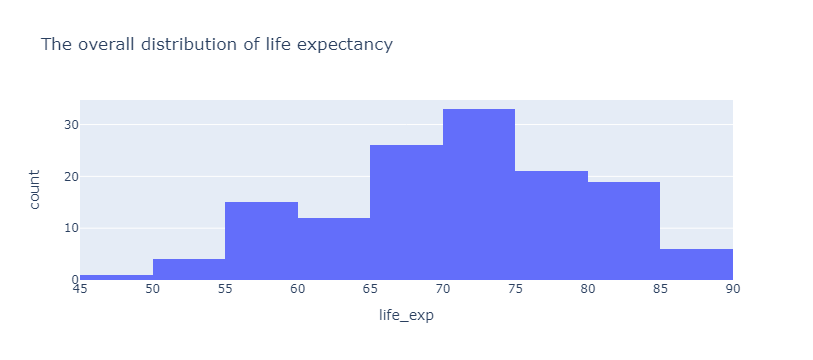

In [20]:
# Life expectancy frequency statistics
count=px.histogram(data,x="life_exp",title="The overall distribution of life expectancy")
count.show()

The distribution of life expectancy generally approximates a normal distribution, with the highest range being 70-75 years, followed by 65-70 years.

<AxesSubplot:xlabel='count', ylabel='Status'>

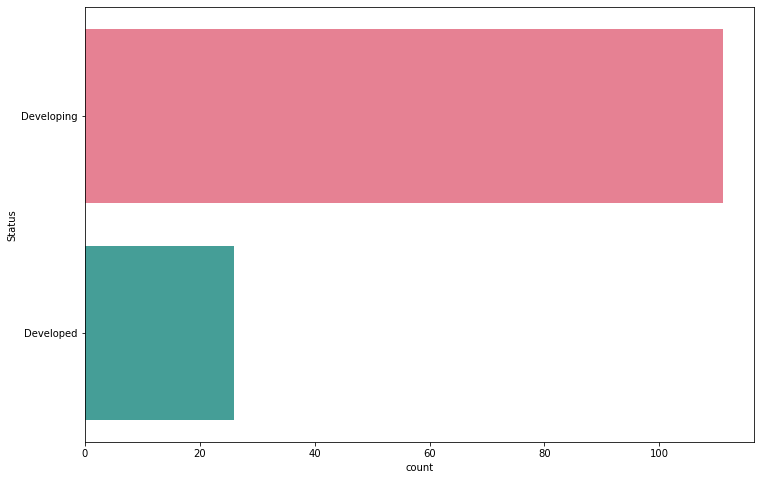

In [21]:
# count of developed countries and developing countries
plt.figure(figsize=(12,8))
sns.countplot(data=data, y= 'Status', order=data["Status"].value_counts().index, palette= "husl")

The number of developing countries is significantly greater than that of developed countries. The number of developed countries is only more than 20, which indicates that the group of developed countries may have some inaccuracy in regression and prediction due to the small number of samples in the subsequent analysis based on the state of countries.

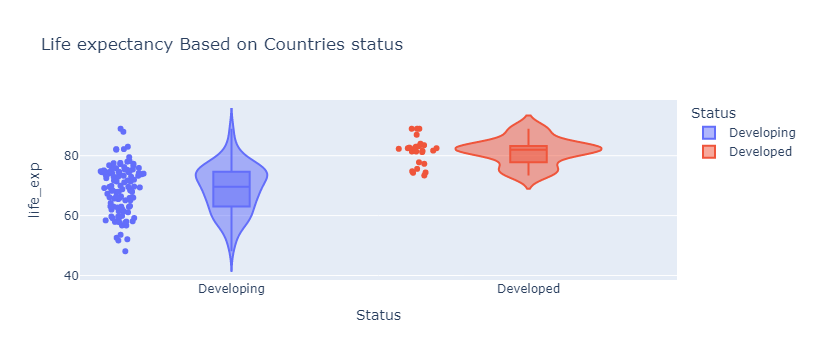

In [22]:
# Show life expectancy by groups
boxplot=px.violin(data,x="Status",y="life_exp",color="Status",box=True, points="all",title="Life expectancy Based on Countries status")
boxplot.show()

As can be seen from the figure above, the overall boxplot of developed countries is higher than that of developing countries, and the data is more concentrated. This means that life expectancy is generally higher and more concentrated in developed countries. The median line is closer to the top, meaning high life expectancy is more concentrated. In developing countries, the boxplot is longer, which means the distribution is more dispersed, and the median means the size is more evenly distributed.

In [23]:
# split data by country status
ed = data[data["Status"]=="Developed"]
ing = data[data["Status"]=="Developing"]

In [24]:
# count number of low,medium and high LE
ing_cnt = ing["classification"].value_counts()
ing_cnt = pd.DataFrame(ing_cnt)
ed_cnt = ed["classification"].value_counts()
ed_cnt = pd.DataFrame(ed_cnt)

In [25]:
# concatenate two dataframes
cnt = pd.concat([ing_cnt,ed_cnt],axis=1, join='outer')
cnt.columns=["developing_life_exp","developed_life_exp"]
cnt

developing_life_exp  developed_life_exp
medium                   62                 5.0
low                      35                 NaN
high                     14                21.0

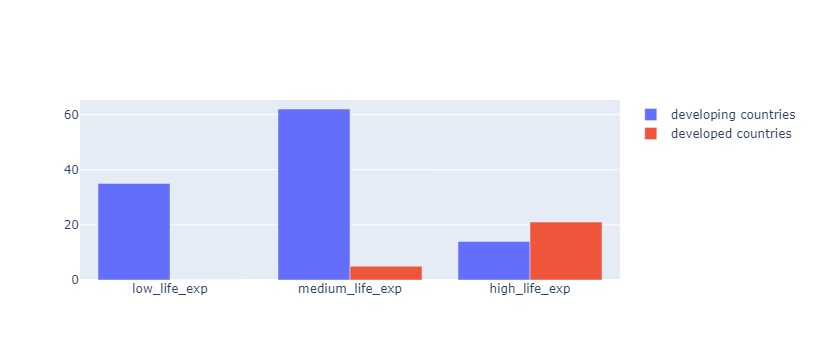

In [26]:
# visualize the result
import plotly.graph_objects as go
cle = ['low_life_exp', 'medium_life_exp', 'high_life_exp']
 
fig = go.Figure(data=[
    go.Bar(name='developing countries', x=cle, y=[35, 62, 14]),
    go.Bar(name='developed countries', x=cle, y=[0, 5, 21])
])

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

The chart above shows that the developing world has the largest number of countries with the medium level of life expectancy, followed by the lower level. Developed countries have the largest number of high levels of life expectancy, more than developing countries, and no low levels.

## Data analysis

After understanding the overall situation of the data, in order to further analyze the data and find out the main factors affecting life expectancy, the training and analysis of different models will be carried out, including: <br/>
1. Ordinary least square regression <br/>
2. Decision tree <br/>
3. Random Forest <br/>
4. XGBoost<br/>
5. KNN<br/>

First, the data set is divided into training subset and test subset, and the above methods are used to train the model uniformly. After training, R-square and RMSE index of the model were compared and visualized to find a better fitting method and model. Secondly, different methods are used to find out the factors that have the greatest impact on life expectancy, and the most important factors are selected as features. Finally, these features are used to train the model again, and KNN analysis and visualization of decision tree are carried out on the dataset.

### Predictions and effects

Splitting data into train and test subsets

In [27]:
# drop unwanted variables
tree = data.drop(["Country","Year","Status","Sub_region","classification"], axis=1)

random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(tree.drop(['life_exp'], axis = 1), tree.life_exp, random_state=random_state_split)

print(f"The shape of training X is:{train_x.shape}. The shape of training Y is:{train_y.shape}")
print(f"The shape of testing X is:{test_x.shape}. The shape of test Y is:{test_y.shape}")

# check whether the index of train_x and train_y is identical.
print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))


The shape of training X is:(102, 10). The shape of training Y is:(102,)
The shape of testing X is:(35, 10). The shape of test Y is:(35,)
True
True


### Comparing models

In order to simplify the model training by repeating similar steps each time, the steps to be carried out by the pipeline are encapsulated here, and the process is uniformly installed in the pipeline to train together and output the fitting effect of the training.

In [28]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])

In [29]:
numeric_features = ['Alcohol','BMI','HIV_AIDS','GDP','expenditure','Population','Schooling','a_mortality','ift_death']
preprocessor = ColumnTransformer(
   transformers=[('numeric', numeric_transformer, numeric_features)])

In [30]:
# required methods of model training
regressors = {
    'Linear': LinearRegression(),
    'CART': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor()
}

In [31]:
# a dict to store the R2 of training and testing data
dict_r2 = dict()

for name, regressor in regressors.items():
    pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor', regressor)
           ])
    model = pipeline.fit(train_x, train_y)
    predictions = model.predict(test_x)
    dict_r2[name] = [model.score(train_x, train_y), model.score(test_x, test_y), model.score(train_x, train_y) - model.score(test_x, test_y)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_r2, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff'])
df_models

R2_train_data  R2_test_data   R2_diff
Linear       0.828605      0.829009 -0.000403
CART         1.000000      0.790872  0.209128
RF           0.981769      0.922285  0.059484
XGB          1.000000      0.836307  0.163693

From the R-square of several models, it can be seen that the explanatory variables in the four models can explain 80 to 100 percent of the changes in the dependent variables. In addition, they generally have better performance in train data and lower scores in test data. Among them, CART and XGBoost are the best performers in train data, while Random Forest is the best fit in test data. Linear Regression shows the least difference between train data and test data.

The following is a visual presentation of this result to more intuitively observe the R-squared situation of these methods.

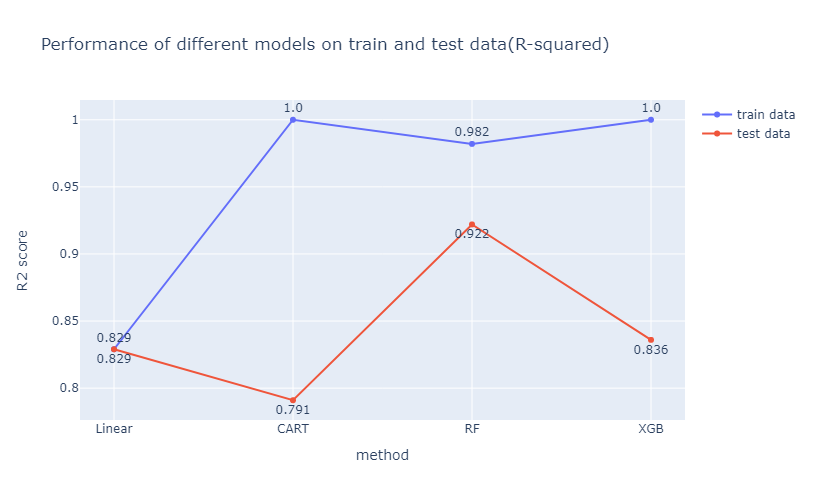

In [32]:
import plotly.graph_objects as go

# Extract the data from the dataframe and convert it to a list
method_list = df_models.index
y1_list = np.array(df_models["R2_train_data"].round(3)).tolist()
y2_list = np.array(df_models["R2_test_data"].round(3)).tolist()
#print(y1_list)

# plot
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        name="train data",
        x=method_list,
        y=y1_list,
        mode="markers+lines+text",
        text=y1_list,
        textposition="top center"
))
fig.add_trace(
    go.Scatter(
        name="test data",
        x=method_list,
        y=y2_list,
        mode="markers+lines+text",
        text=y2_list,                 
        textposition="bottom center"       
))

fig.update_layout(
    title="Performance of different models on train and test data(R-squared)",
    xaxis=dict(title="method"),
    yaxis=dict(title="R2 score"),
    width=800,
    height=500
)

fig.show()

RF is better for train and test data in general.

Next, the RMSE of the model is calculated.

In [33]:
# a dict to store the RMSE of training and testing data
dict_rmse = dict()

for name, regressor in regressors.items():
    pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor', regressor)
           ])
    RMSEmodel = pipeline.fit(train_x, train_y)
    preRMSE = RMSEmodel.predict(test_x)
    rmse_train = mean_squared_error(train_y, RMSEmodel.predict(train_x), squared=False)
    rmse_test = mean_squared_error(test_y, RMSEmodel.predict(test_x), squared=False)
    dict_rmse[name] = [rmse_train ,rmse_test, rmse_train - rmse_test]

# transform dict_models to dataframe
RMSE_models = pd.DataFrame.from_dict(dict_rmse, orient='index', columns=['RMSE_train_data', 'RMSE_test_data', 'RMSE_diff'])
RMSE_models

RMSE_train_data  RMSE_test_data  RMSE_diff
Linear         3.627611        3.687176  -0.059565
CART           0.000000        4.218293  -4.218293
RF             1.097920        2.594706  -1.496785
XGB            0.000762        3.607626  -3.606864

It can be seen from the above results that RMSE of all training models is below 4. Among them, CART's prediction deviation from the true value in train data is the lowest, which is infinitely close to 0. However, it is 3.8 in test data, indicating that CART may have a certain degree of overfitting. A similar situation applies to the XGBoost method. In addition, Random Forest has the best performance and the lowest deviation on test data. The Linear Regression shows the least fluctuation between the two.

Next, visualize the result.

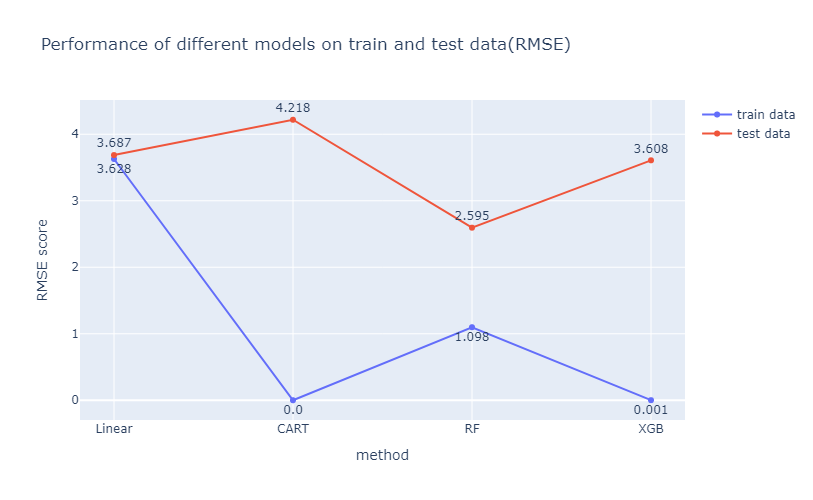

In [34]:
method_list = RMSE_models.index
y1_list = np.array(RMSE_models["RMSE_train_data"].round(3)).tolist()
y2_list = np.array(RMSE_models["RMSE_test_data"].round(3)).tolist()
#print(y1_list)

# plot
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        name="train data",
        x=method_list,
        y=y1_list,
        mode="markers+lines+text",
        text=y1_list,
        textposition="bottom center"
))
fig.add_trace(
    go.Scatter(
        name="test data",
        x=method_list,
        y=y2_list,
        mode="markers+lines+text",
        text=y2_list,                 
        textposition="top center"       
))

fig.update_layout(
    title="Performance of different models on train and test data(RMSE)",
    xaxis=dict(title="method"),
    yaxis=dict(title="RMSE score"),
    width=800,
    height=500
)

fig.show()


RF is better for train and test data in general.

### Search for influencing factors

After comparing the fitting effects of different models, we then use these models to find out which variables have more influence on life expectancy among the many explanatory variables. These variables are extracted later as features for analysis. Next, look for factors that have a bigger impact on life expectancy in different ways.

#### OLS regression

First, a heatmap is drawn for the dataset to see the correlation between factors. The higher the number, the stronger the correlation.

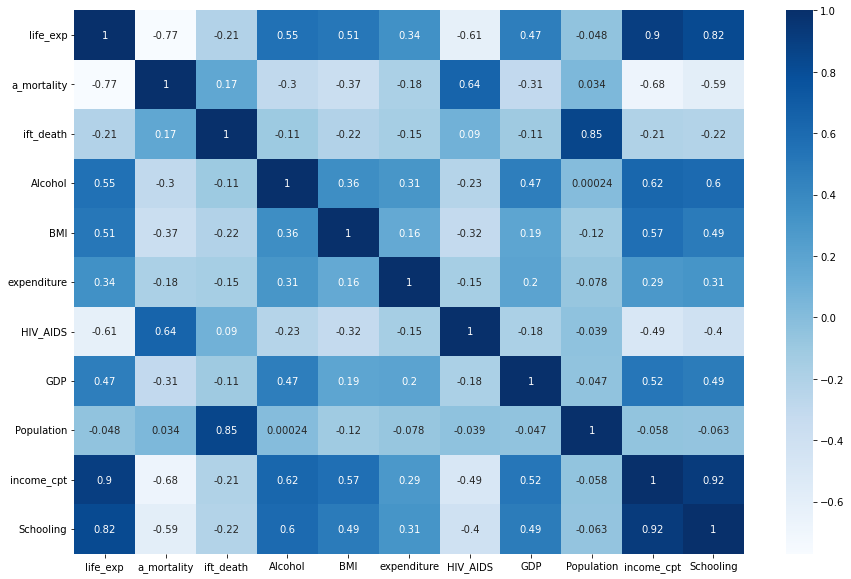

In [35]:
data_htmap = data.drop(["Year"], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(data_htmap.corr(),annot=True,cmap='Blues')
plt.show()

Then, in order to prevent multicollinearity among explanatory variables, the accuracy of regression results was affected. VIF test was performed on explanatory variables to remove factors with multicollinearity.

Define a vif function.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):

    while True:
        df_with_const = add_constant(df)
        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
        vif_df = vif_df.drop('const')
        
        print('Max VIF:', vif_df.VIF.max())

        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

In [37]:
# apply VIF on models
df_predictors_selected_VIF = drop_column_using_vif_(data.drop(["Country","Year",
                                                               "Status","life_exp",
                                                               "Sub_region","classification"], axis=1))

print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Max VIF: 10.460912680766354
Dropping: income_cpt
Max VIF: 4.08351398893009
The columns remaining after VIF selection are:
Index(['a_mortality', 'ift_death', 'Alcohol', 'BMI', 'expenditure', 'HIV_AIDS',
       'GDP', 'Population', 'Schooling'],
      dtype='object')


In [38]:
# drop the column and show the summary of rest of data
df = data.drop(["income_cpt","Year"], axis=1)

summary=df.describe().round(2).T
summary[['count','mean','std','min','max']]

count         mean           std    min           max
life_exp     137.0        71.32  8.900000e+00  48.10  8.900000e+01
a_mortality  137.0       154.69  1.074400e+02   2.00  5.220000e+02
ift_death    137.0        27.20  9.806000e+01   0.00  9.570000e+02
Alcohol      137.0         3.30  4.180000e+00   0.01  1.519000e+01
BMI          137.0        40.50  2.093000e+01   2.00  7.710000e+01
expenditure  137.0         6.17  2.630000e+00   1.21  1.373000e+01
HIV_AIDS     137.0         0.73  1.430000e+00   0.10  9.400000e+00
GDP          137.0      8795.00  1.738704e+04  12.28  1.191727e+05
Population   137.0  21541070.10  1.141496e+08  41.00  1.293859e+09
Schooling    137.0        12.94  2.900000e+00   5.30  2.040000e+01

In [39]:
# do the OLS regression
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

ols_result = ols("life_exp ~ Alcohol+BMI+HIV_AIDS+GDP+expenditure+Population+Schooling+a_mortality+ift_death",data=df).fit()

print(ols_result.summary()) 

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     74.45
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           2.42e-46
Time:                        19:55:08   Log-Likelihood:                -367.63
No. Observations:                 137   AIC:                             755.3
Df Residuals:                     127   BIC:                             784.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.4405      2.438     23.146      

The above results show that the R-square value is 0.841, indicating that these variables explain about 84% of the variation in life expectancy. The P-value of most independent variables is less than 0.1, which means that the dependent variable can be significantly affected at least at the significance level of 10%. Of these, schooling and adult mortality are the most significant, both close to 0. And the coefficient of schooling is positive, meaning that a country with a higher level of education has a higher life expectancy, whereas a place with a higher adult mortality has a lower life expectancy. Since no standardization was carried out before regression, the value of the coefficient itself is not strong reference. In addition, Durbin-Watson also advanced close to 2, indicating this is a good fit.

Next, the data set was divided according to the state of the country, and OLS regression was conducted respectively to check whether there were differences in the influencing factors of life expectancy between developed and developing countries.

In [40]:
all_countries=ols("life_exp~Alcohol+BMI+HIV_AIDS+GDP+expenditure+Population+Schooling+a_mortality+ift_death",data=df).fit()
developed=ols("life_exp~Alcohol+BMI+HIV_AIDS+GDP+expenditure+Population+Schooling+a_mortality+ift_death",data=df[df['Status']=="Developed"]).fit() 
developing=ols("life_exp~Alcohol+BMI+HIV_AIDS+GDP+expenditure+Population+Schooling+a_mortality+ift_death",data=df[df['Status']=="Developing"]).fit()  

table=summary_col( 
    [all_countries,developed,developing],
    stars=True, # show * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f',
    model_names=['all_countries','developed','developing'],
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))})

print(table)


               all_countries developed developing
-------------------------------------------------
Intercept      56.441***     80.761*** 58.096*** 
               (2.438)       (9.890)   (2.656)   
Alcohol        0.174*        0.106     0.168     
               (0.100)       (0.175)   (0.123)   
BMI            0.034*        -0.000    0.047**   
               (0.018)       (0.038)   (0.020)   
HIV_AIDS       -0.993***     8.076***  -1.009*** 
               (0.293)       (0.989)   (0.274)   
GDP            0.000*        -0.000    0.000***  
               (0.000)       (0.000)   (0.000)   
expenditure    0.257**       0.011     0.222     
               (0.128)       (0.287)   (0.146)   
Population     0.000         -0.000*   0.000     
               (0.000)       (0.000)   (0.000)   
Schooling      1.240***      0.331     1.000***  
               (0.175)       (0.493)   (0.207)   
a_mortality    -0.028***     -0.056**  -0.026*** 
               (0.004)       (0.024)   (0.004)   

As can be seen from the table of results above, there is a difference in factor significance between developed and developing countries. In developed countries, none of the factors seem to be particularly significant, with the exception of HIV, population and adult mortality. By contrast, life expectancy in developing countries is significantly affected by such factors as schooling, GDP, adult mortality, HIV, and so on. Moreover, R-square also decreases in developed countries, suggesting that these factors better explain life expectancy in developing countries than in developed ones.

Next, two factors were picked, visualized along with life expectancy, and distinguished between developed countries (red circles) and developing countries (blue circles).

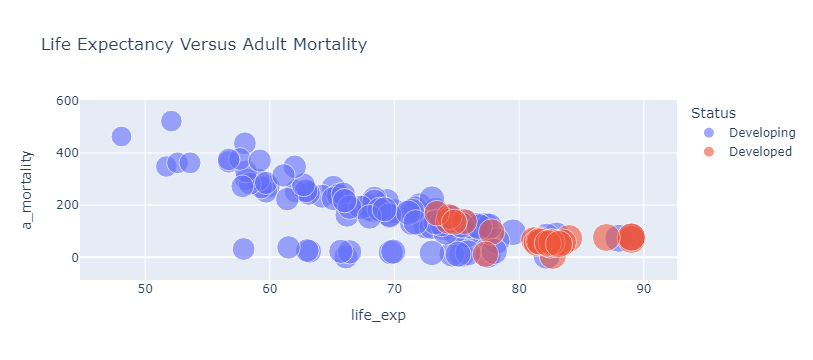

In [41]:
plot1 = px.scatter(df,y='a_mortality',x='life_exp',color='Status',size='life_exp',opacity=0.6 , title='Life Expectancy Versus Adult Mortality')
plot1

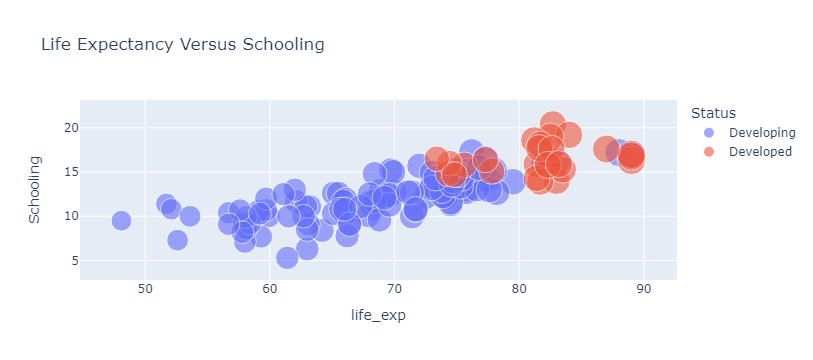

In [42]:
plot2 = px.scatter(df,y='Schooling',x='life_exp',color='Status',size='life_exp',opacity=0.6 , title='Life Expectancy Versus Schooling')
plot2

We can see that the developed countries represented by the red circle have higher life expectancy and higher education levels and lower adult mortality overall. And there is an obvious negative and positive linear relationship between these two factors and life expectancy.

#### CART & RF & XGBoost

Next, the importance of each factor was ranked using classification and regression tree, random forest, and XGBoost methods.

Due to the fact that the process of conducting these three methods are highly similar, according to the DRY (Don't Repeat Yourself) principle, here we uses loops to run all three methods together.

In [43]:
# put the three methods into a list for looping later.
Methods = [DecisionTreeRegressor, RandomForestRegressor, XGBRegressor]

In [44]:
# Set the hyperparameter to adjust
hyperparameters = {'max_depth':[10,15,20,25,30], 'min_samples_split':[2,3,4,5,6]}
hyperparameters_xgb = {'max_depth':[10,20,30,40,50], 'n_estimators':[25,50,75,100,125]}

# Set random seeds
randomState = 10000
randomState_xgb = 125

Using the loop structure to calculate the importance of the features of the three methods, and using the permutation check the relative importance of each feature.

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
             Importance
Feature                
income_cpt     1.312316
a_mortality    0.185565
HIV_AIDS       0.054887
expenditure    0.004423
Schooling      0.003527
Alcohol        0.003148
ift_death      0.002956
Population     0.000000
BMI           -0.001849
GDP           -0.025136


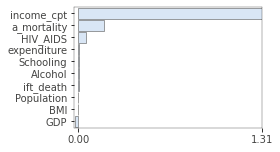

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
             Importance
Feature                
income_cpt     0.623418
a_mortality    0.082358
HIV_AIDS       0.015556
Population     0.011716
expenditure    0.011025
Schooling      0.005060
ift_death      0.001329
Alcohol       -0.000088
GDP           -0.000851
BMI           -0.002662


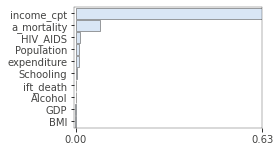

<class 'xgboost.sklearn.XGBRegressor'>
             Importance
Feature                
income_cpt     0.571819
a_mortality    0.274402
HIV_AIDS       0.121333
Schooling      0.017115
Population     0.010086
ift_death      0.009397
expenditure    0.008132
GDP            0.005015
BMI           -0.001995
Alcohol       -0.007372


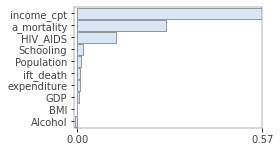

In [45]:
# XGBoost is a little different from the other two, so use the if judgment separately.
for method in Methods:
    if method != XGBRegressor:
        reg = method(random_state = randomState)
        clf = GridSearchCV(reg, hyperparameters)
        clf.fit(train_x, train_y)
        reg_final = method(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState)
        reg_final.fit(train_x, train_y)
        
    else:
        xgb = method(random_state = randomState_xgb)
        gscv_xgb = GridSearchCV(xgb, hyperparameters_xgb)
        gscv_xgb.fit(train_x, train_y)
        reg_final = method(max_depth=gscv_xgb.best_params_['max_depth'], n_estimators=gscv_xgb.best_params_['n_estimators'], random_state=randomState_xgb)
        reg_final.fit(train_x, train_y)
    
    # visualize
    print(method)
    imp = rfpimp.importances(reg_final, test_x, test_y) # permutation
    print(imp)
    viz = rfpimp.plot_importances(imp)
    viz.view()
    

It can be seen that after conducting these three methods, relatively more important factors have a high degree of overlap. The most important of these factors was income_cpt, followed by a_mortality and HIV_AIDS. In addition, population with a relatively high ranking is also selected, and these four variables are used as the features of the classification.

Then, the classification analysis of decision tree and KNN is carried out, and as well as the visualization.

### Classification

The features with relatively important influences selected above are extracted, and the classification reference of the final life expectancy is assigned to y.

In [46]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

dtc_x = data[["income_cpt","a_mortality","HIV_AIDS","Population"]]
dtc_y = data.classification

Transform features before classification.

In [47]:
vec = DictVectorizer()   
tran_x = vec.fit_transform(dtc_x.to_dict('record'))

arr_x = tran_x.toarray()
print (vec.feature_names_)
print(arr_x.shape) 
print(type(arr_x)) 

['HIV_AIDS', 'Population', 'a_mortality', 'income_cpt']
(137, 4)
<class 'numpy.ndarray'>


/tmp/ipykernel_469/4082344132.py:2: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



Encode the categories of life expectancy groups.

In [48]:
label = LabelEncoder()  
label.fit(['low','medium','high']) 
trans_labels = label.transform(data['classification'])

Finally, the data containing features are divided into x and y of train and test.

In [49]:
X_train,X_test,y_train,y_test=train_test_split(arr_x,trans_labels,test_size=0.25,random_state=33)

#### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf_decision_tree = DecisionTreeClassifier()  
clf_decision_tree.fit(X_train, y_train) 
test_pred_decision_tree = clf_decision_tree.predict(X_test) 

By checking the evaluation result table of the classification, it can be found that the accuracy is 0.89, indicating that the classification is relatively accurate.

In [51]:
print (metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.80      1.00      0.89         4
           2       0.95      0.87      0.91        23

    accuracy                           0.89        35
   macro avg       0.84      0.91      0.87        35
weighted avg       0.90      0.89      0.89        35



In order to see the classification process clearly, the decision tree is visualized so that each color represents a category. Finally, different colors dominate at the end of the tree, which means that there are "cleanly" grouped.

In [52]:
!pip install dtreeplot
from dtreeplot import model_plot
from sklearn import datasets

a = DecisionTreeClassifier(max_depth=3)
b = a.fit(X_train, y_train)

# visualize tree model
model_plot(model = b, features = vec.feature_names_, labels=y_train, width = 800, height=400)

#### K-NearestNeighbor(KNN)

Next, we use KNN, which use the euclidean distance.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
 
# Create a KNN classifier
knn = KNeighborsClassifier()

Firstly, pick the optimal number of neighbors.

In [54]:
# Define the n_neighbors parameter range
param_grid = {'n_neighbors': range(1, 10)}
grid_search = GridSearchCV(knn, param_grid, cv=3)

Automatic optimization is done using the GridSearchCV object and number of neighbor is 7.

In [55]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'n_neighbors': 7}


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

/opt/con

In [56]:
# Assign the number of most neighbors to t
t = grid_search.best_params_['n_neighbors']

Create a KNN classifier and train the model

In [57]:
knn = KNeighborsClassifier(n_neighbors=t)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model on the test set
y_pred = knn.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Output result distribution matrix

In [59]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy:")
print(accuracy_score(y_test, y_pred))

[[2 3 3]
 [1 3 0]
 [9 7 7]]
Accuracy:
0.34285714285714286


Output confusion matrix, F1-score, and accuracy rate

In [60]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.25      0.20         8
           1       0.23      0.75      0.35         4
           2       0.70      0.30      0.42        23

    accuracy                           0.34        35
   macro avg       0.37      0.43      0.33        35
weighted avg       0.52      0.34      0.36        35



## Results

First, in terms of the dependent variable life expectancy, its overall distribution approximates a normal distribution, with most countries concentrated between 65 and 75 years old and a small number above 85 and below 55. When grouped by country status, developed countries, although fewer in number, have a higher overall life expectancy than developing countries and a more concentrated distribution. Among the prediction models of different methods, the random forest has a better combination of R-square and RMSE in the training and test sets compared to the other three methods, and it can reflect the data set better.

Different models present different results when comparing the importance of the factors affecting life expectancy using different methods. In linear regression, overall schooling and adult mortality have the most significant role, positive and negative respectively, followed by HIV. After grouping, the situation is similar in developing countries, but the role of schooling is not significant in developed countries, instead, the population has a weak negative effect on life expectancy. In the other models, the results are similar. Income, adult mortality, HIV, and population all rank high in the feature importance ranking. This indicates that, in general, these factors have a relatively important impact on the life expectancy of all countries in the world.

## Discussion

Throughout the process of data processing and analysis, some aspects still have not been well considered. During the pre-processing of the data, the extreme values in the data were not processed to ensure a better match between the data and reality, taking into account the special circumstances that each country may have. Therefore, individual values that deviate significantly from the mean value may have some impact on the model in the subsequent analysis. In addition, due to the imperfect data of some small countries, there are missing values. They are directly dropped instead of using the mean value to replace the missing values so that the sample size is not the situation of all countries in the real world. Secondly, there is no standardisation of all the data so that all factors have values between 0 and 1, which would give a more accurate effect size on life expectancy. The models analysed might have been more accurate if the data had been processed more carefully.

## Conclusion

Based on the above analysis and results, it can be concluded that, in general, the socio-economic conditions of a country can have a significant impact on the life expectancy of its citizens, such as social security (corresponding to adult mortality), income, population, etc. The role of the economy is particularly significant in developing countries, where the higher the population’s educational level, the higher the life expectancy. Conversely, in developed countries, where economic development is already well advanced, economic factors do not play a significant role. The marginal effect of economic development on life expectancy decreases as economic development increases. There are, however, some factors that have equally significant effects in developed and developing countries, such as mortality, which directly affects the length of a person's life, and HIV, which is directly related to health, The economic impact is a reflection of a country's ability to provide good medical care so that people do not die prematurely because of inadequate medical facilities, lack of financial means, or inadequate education of health care workers, which could lead to a longer life expectancy. More direct influences, such as untreatable HIV and mortality, which is a direct reflection of mortality, can go beyond economic constraints and have a significant impact on life expectancy.

Therefore, if a country wants to increase the life expectancy of its citizens, it cannot ignore the importance of economic development in the first place. The economy is the basic guarantee that in the absence of a better economy, economic development can bring about a very significant change in life expectancy. It is only after economic growth has reached a certain level that its importance diminishes, and other factors need to be taken into account to improve life expectancy and enhance the health of the population.

## Reference

Azomahou, T.T., Boucekkine, R. and Diene, B. (2009) ‘A closer look at the relationship between life expectancy and economic growth’, International Journal of Economic Theory, 5(2), pp. 201–244. Available at: https://doi.org/10.1111/j.1742-7363.2009.00105.x.<br/>
Herzer, D. and Nunnenkamp, P. (2015) ‘Income Inequality and Health: Evidence from Developed and Developing Countries’, Economics, 9(1). Available at: https://doi.org/10.5018/economics-ejournal.ja.2015-4.<br/>
Kim, J.I. and Kim, G. (2016) ‘Country-Level Socioeconomic Indicators Associated with Healthy Life Expectancy: Income, Urbanization, Schooling, and Internet Users: 2000–2012’, Social Indicators Research, 129(1), pp. 391–402. Available at: https://doi.org/10.1007/s11205-015-1107-2.<br/>
Mondal, M.N.I. and Shitan, M. (2014) ‘Relative Importance of Demographic, Socioeconomic and Health Factors on Life Expectancy in Low- and Lower-Middle-Income Countries’, Journal of Epidemiology, 24(2), pp. 117–124. Available at: https://doi.org/10.2188/jea.JE20130059.<br/>
Okamoto, K. (2006) ‘Life expectancy at the age of 65 years and environmental factors: An ecological study in Japan’, Archives of Gerontology and Geriatrics, 43(1), pp. 85–91. Available at: https://doi.org/10.1016/j.archger.2005.09.005.<br/>
United Nations (2022) Health, United Nations Sustainable Development. Available at: https://www.un.org/sustainabledevelopment/health/ (Accessed: 15 April 2023).<br/>
Wilson, M. and Daly, M. (1997) ‘Life expectancy, economic inequality, homicide, and reproductive timing in Chicago neighbourhoods’, BMJ, 314(7089), p. 1271. Available at: https://doi.org/10.1136/bmj.314.7089.1271.<br/>
World Health Organization (2019) GHE: Life expectancy and healthy life expectancy. Available at: https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy (Accessed: 15 April 2023).<br/>
